<a href="https://colab.research.google.com/github/Yaminikanna18/bioinfo-learning/blob/main/week1_covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 — COVID-19 Trends (UK vs Germany)
**Goal:** Load Johns Hopkins CSSE dataset, compute daily new cases, plot 7-day averages, and save plots.

**Author:** <your YAMINI>  
**Date:** <12/08/2025>


In [ ]:
# Imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [ ]:
# Imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [ ]:
# Load JHU global confirmed cases time series (CSV from GitHub)
url = ("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"
       "csse_covid_19_data/csse_covid_19_time_series/"
       "time_series_covid19_confirmed_global.csv")

df = pd.read_csv(url)
print("Shape:", df.shape)
df.head()


Shape: (289, 1147)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
# See what country names look like
countries = df['Country/Region'].unique()
[c for c in countries if 'king' in c.lower() or 'germ' in c.lower()]


['Germany', 'United Kingdom']

In [ ]:
# Filter rows for United Kingdom and Germany
countries_of_interest = ['United Kingdom', 'Germany']

df_filtered = df[df['Country/Region'].isin(countries_of_interest)]

print("Filtered shape:", df_filtered.shape)
df_filtered.head()


Filtered shape: (16, 1147)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
135,NaN,Germany,51.165691,10.451526,0,0,0,0,0,1,...,38168908,38189954,38202571,38210850,38210850,38210851,38210851,38231610,38241231,38249060
264,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,3904,3904,3904,3904,3904,3904,3904,3904,3904,3904
265,Bermuda,United Kingdom,32.307800,-64.750500,0,0,0,0,0,0,...,18799,18814,18814,18814,18814,18814,18814,18814,18828,18828
266,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,7305,7305,7305,7305,7305,7305,7305,7305,7305,7305
267,Cayman Islands,United Kingdom,19.313300,-81.254600,0,0,0,0,0,0,...,31472,31472,31472,31472,31472,31472,31472,31472,31472,31472


In [ ]:
# Drop columns not needed for time series and aggregate provinces by country
df_agg = df_filtered.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum()

# Transpose so dates are rows and countries are columns
df_t = df_agg.T

# Convert index (dates) to datetime objects
df_t.index = pd.to_datetime(df_t.index)

# Calculate daily new cases by differencing cumulative counts
df_daily = df_t.diff().fillna(0).astype(int)

df_daily.head()


/tmp/ipython-input-1087181761.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_t.index = pd.to_datetime(df_t.index)


Country/Region,Germany,United Kingdom
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0


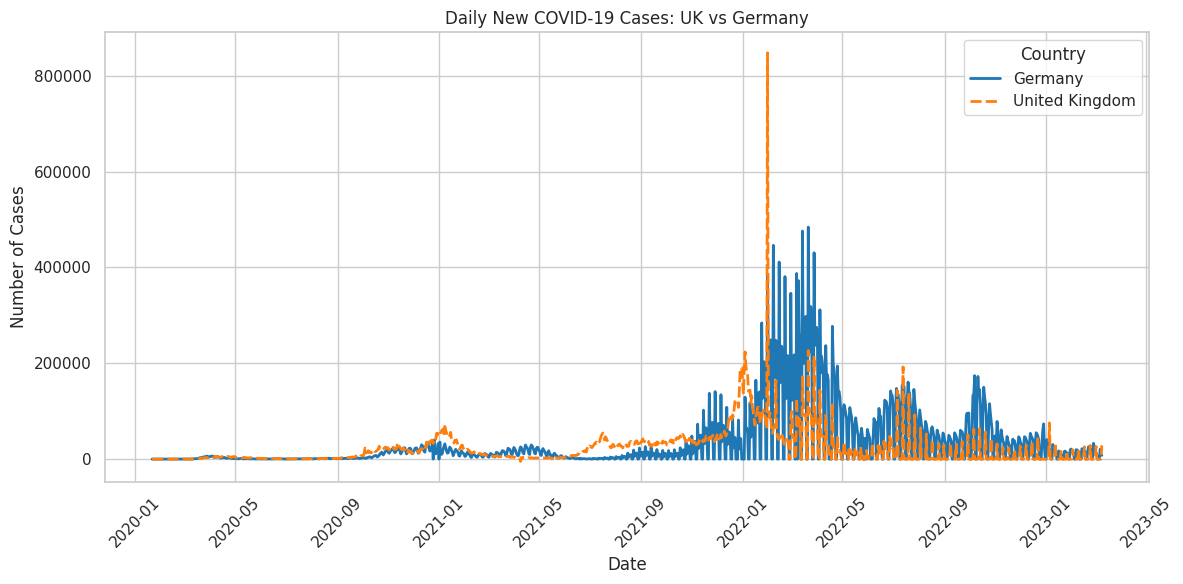

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_daily, palette="tab10", linewidth=2)

plt.title('Daily New COVID-19 Cases: UK vs Germany')
plt.ylabel('Number of Cases')
plt.xlabel('Date')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


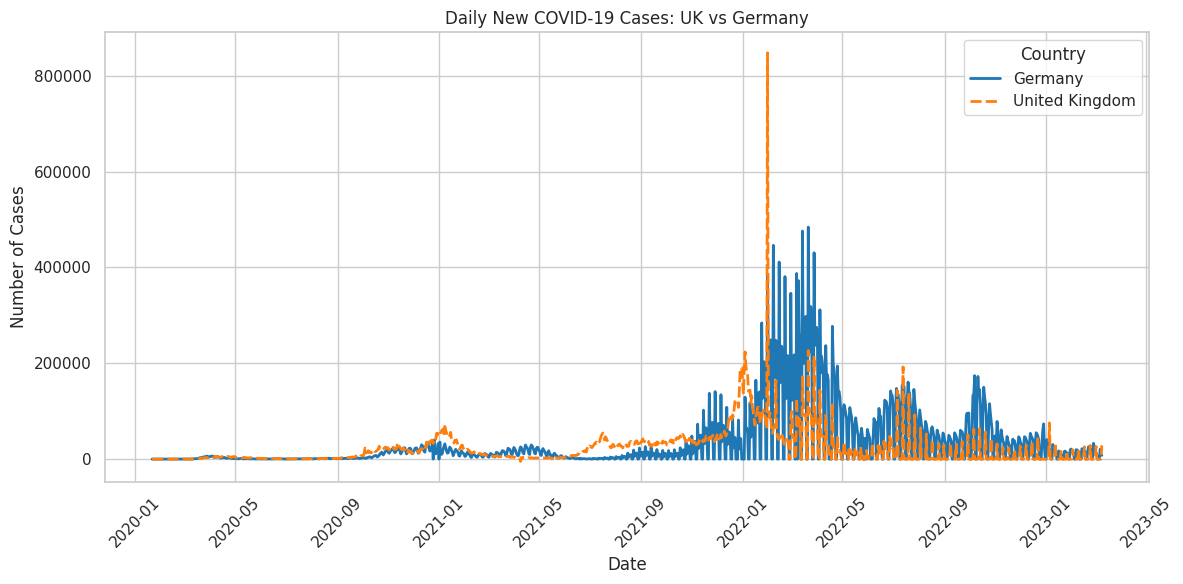

In [ ]:
import os

# Make a folder to store plots if it doesn't exist
os.makedirs('plots', exist_ok=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, palette="tab10", linewidth=2)
plt.title('Daily New COVID-19 Cases: UK vs Germany')
plt.ylabel('Number of Cases')
plt.xlabel('Date')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Save plot as PNG file
plt.savefig('plots/daily_cases_uk_germany.png')

plt.show()


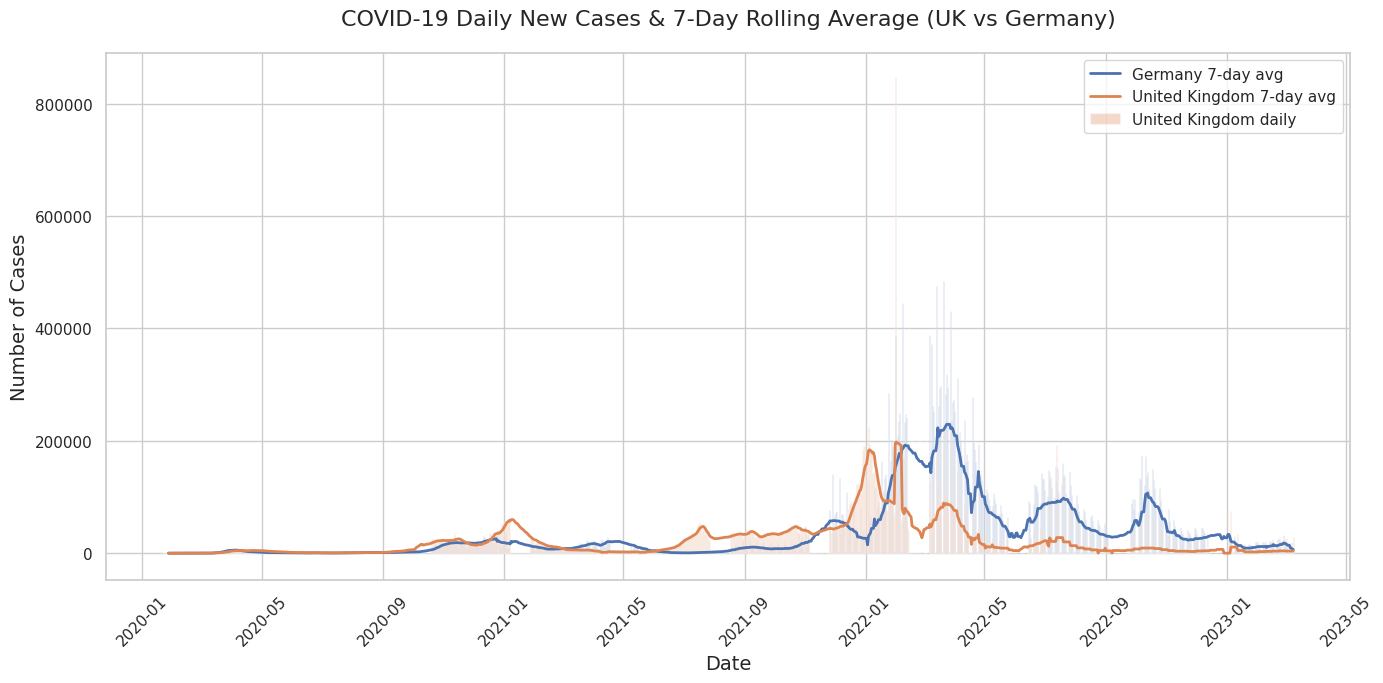

In [ ]:
# Calculate 7-day rolling average for smoothing
df_rolling = df_daily.rolling(window=7).mean()

# Set plot style
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Plot for each country: bars for daily cases, line for rolling average
for country in df_daily.columns:
    # Bars for daily new cases
    plt.bar(df_daily.index, df_daily[country], alpha=0.3, label=f"{country} daily" if country == 'United Kingdom' else None)
    # Line for 7-day rolling average
    plt.plot(df_rolling.index, df_rolling[country], linewidth=2, label=f"{country} 7-day avg")

# Titles and labels
plt.title("COVID-19 Daily New Cases & 7-Day Rolling Average (UK vs Germany)", fontsize=16, pad=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14)

# Rotate date labels
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Optional: tighten layout for better spacing
plt.tight_layout()

# Save plot
os.makedirs('plots', exist_ok=True)
plt.savefig("plots/daily_cases_with_rolling_avg.png", dpi=300)

plt.show()


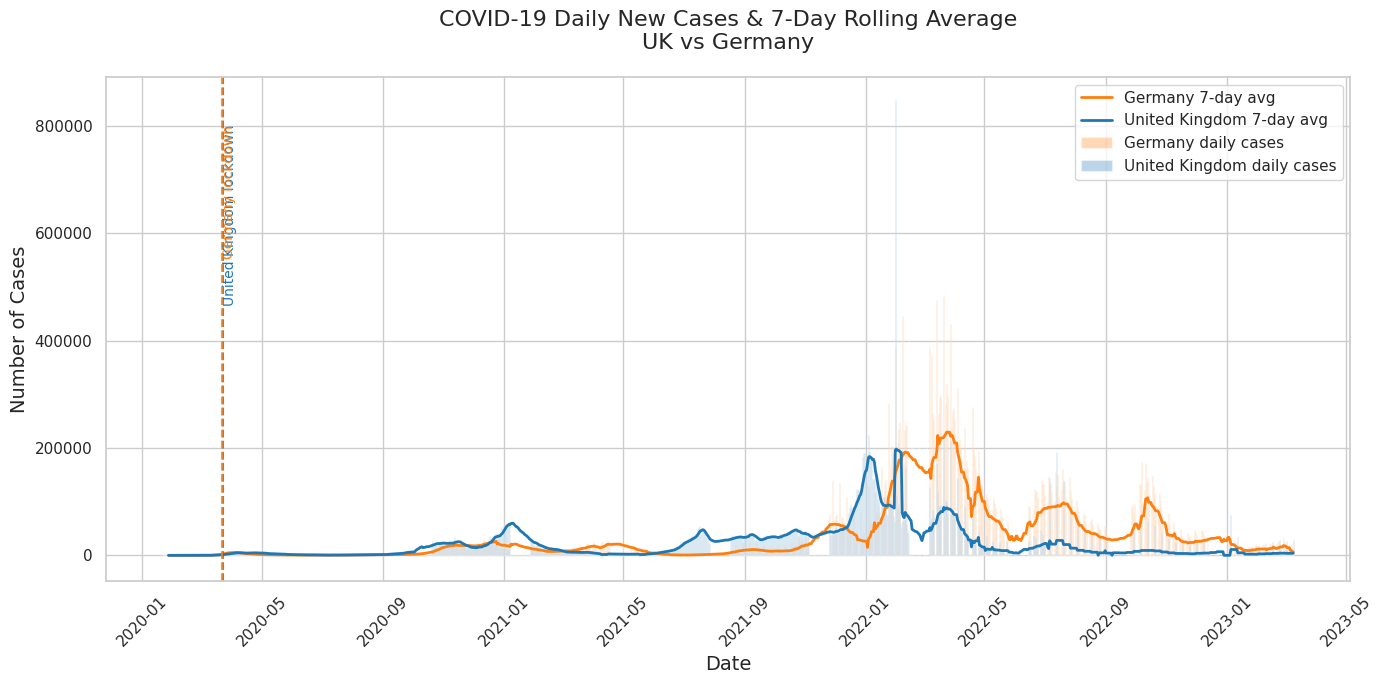

In [ ]:
# Calculate 7-day rolling average
df_rolling = df_daily.rolling(window=7).mean()

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Country colors for consistency
colors = {
    'United Kingdom': '#1f77b4',  # blue
    'Germany': '#ff7f0e'          # orange
}

# Plot bars (daily cases) + lines (7-day avg) for each country
for country in df_daily.columns:
    plt.bar(
        df_daily.index,
        df_daily[country],
        color=colors[country],
        alpha=0.3,
        label=f"{country} daily cases"
    )
    plt.plot(
        df_rolling.index,
        df_rolling[country],
        color=colors[country],
        linewidth=2,
        label=f"{country} 7-day avg"
    )

# Highlight lockdown dates (example: UK March 23, 2020; Germany March 22, 2020)
lockdown_dates = {
    'United Kingdom': '2020-03-23',
    'Germany': '2020-03-22'
}

for country, date_str in lockdown_dates.items():
    date = pd.to_datetime(date_str)
    plt.axvline(date, color=colors[country], linestyle='--', linewidth=1.5, alpha=0.8)
    plt.text(date, plt.ylim()[1]*0.9, f"{country} lockdown", rotation=90,
             color=colors[country], fontsize=10, va='top')

# Titles and labels
plt.title("COVID-19 Daily New Cases & 7-Day Rolling Average\nUK vs Germany", fontsize=16, pad=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14)

# Rotate date labels for clarity
plt.xticks(rotation=45)

# Legend
plt.legend()

# Layout
plt.tight_layout()

# Save high-res plot
os.makedirs('plots', exist_ok=True)
plt.savefig("plots/daily_cases_with_rolling_avg_and_lockdown.png", dpi=300)

plt.show()


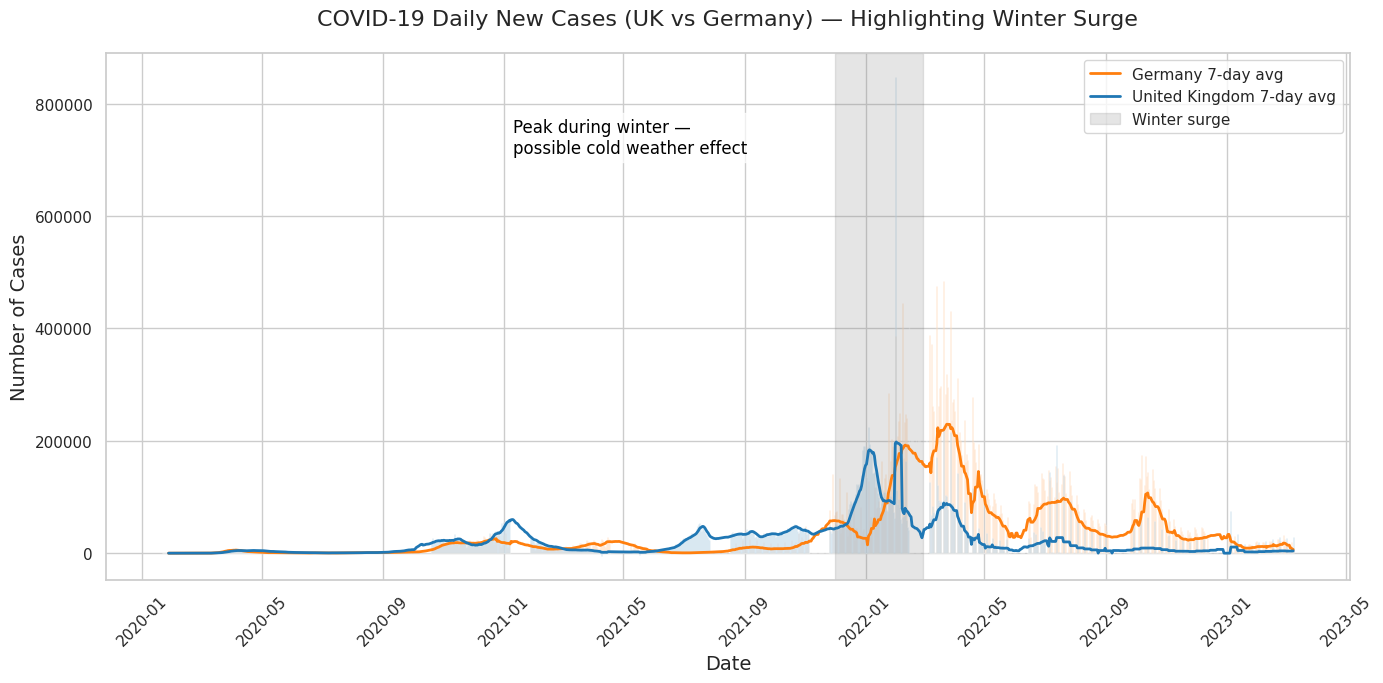

In [ ]:
# Define winter surge period (example: Dec 1, 2020 to Feb 28, 2021)
winter_start = pd.to_datetime("2021-12-01")
winter_end = pd.to_datetime("2022-02-28")

# Create shaded area for winter surge
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

colors = {
    'United Kingdom': '#1f77b4',
    'Germany': '#ff7f0e'
}

# Plot bars + lines
for country in df_daily.columns:
    plt.bar(df_daily.index, df_daily[country], color=colors[country], alpha=0.3)
    plt.plot(df_rolling.index, df_rolling[country], color=colors[country], linewidth=2, label=f"{country} 7-day avg")

# Shade winter surge period
plt.axvspan(winter_start, winter_end, color='gray', alpha=0.2, label='Winter surge')

# Add annotation
plt.text(pd.to_datetime("2021-01-10"), plt.ylim()[1]*0.8,
         "Peak during winter —\npossible cold weather effect",
         fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7))

# Labels and title
plt.title("COVID-19 Daily New Cases (UK vs Germany) — Highlighting Winter Surge", fontsize=16, pad=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Save plot
os.makedirs('plots', exist_ok=True)
plt.savefig("plots/winter_surge_highlight.png", dpi=300)

plt.show()
